<img src="https://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="https://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Input-Output Operations

## Basic I/O with Python

### Writing Objects to Disk

In [1]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
# %config InlineBackend.figure_format = 'svg'

In [2]:
import pickle  
import numpy as np
from random import gauss   

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
a = [gauss(1.5, 2) for i in range(1000000)]  

In [5]:
# adjust to path of your choice
path = '/Users/yves/Temp/data/'  

In [6]:
pkl_file = open(path + 'data.pkl', 'wb')  

In [7]:
%time pickle.dump(a, pkl_file)  

CPU times: user 8.99 ms, sys: 3.69 ms, total: 12.7 ms
Wall time: 11.8 ms


In [8]:
pkl_file.close()  

In [9]:
ll $path*  

-rw-r--r--  1 yves  staff  9003247  4 Jun 11:54 /Users/yves/Temp/data/data.pkl


In [10]:
pkl_file = open(path + 'data.pkl', 'rb')  

In [11]:
%time b = pickle.load(pkl_file)  

CPU times: user 18.3 ms, sys: 6.08 ms, total: 24.4 ms
Wall time: 23.7 ms


In [12]:
a[:3]

[0.4260947619102493, 1.2819491936087586, 2.259594451831343]

In [13]:
b[:3]

[0.4260947619102493, 1.2819491936087586, 2.259594451831343]

In [14]:
np.allclose(np.array(a), np.array(b))  

True

In [15]:
pkl_file = open(path + 'data.pkl', 'wb')

In [16]:
%time pickle.dump(np.array(a), pkl_file)  

CPU times: user 24.5 ms, sys: 3.75 ms, total: 28.2 ms
Wall time: 26.8 ms


In [17]:
%time pickle.dump(np.array(a) ** 2, pkl_file)  

CPU times: user 24.3 ms, sys: 3.45 ms, total: 27.7 ms
Wall time: 26.7 ms


In [18]:
pkl_file.close()

In [19]:
ll $path*  

-rw-r--r--  1 yves  staff  16000326  4 Jun 11:54 /Users/yves/Temp/data/data.pkl


In [20]:
pkl_file = open(path + 'data.pkl', 'rb')

In [21]:
x = pickle.load(pkl_file)  
x[:4]

array([ 0.42609476,  1.28194919,  2.25959445, -0.36542668])

In [22]:
y = pickle.load(pkl_file)  
y[:4]

array([0.18155675, 1.64339373, 5.10576709, 0.13353666])

In [23]:
pkl_file.close()

In [24]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file)  
pkl_file.close()

In [25]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file)  
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 0.42609476  1.28194919  2.25959445 -0.36542668]
y [0.18155675 1.64339373 5.10576709 0.13353666]


In [26]:
!rm -f $path*

### Reading and Writing Text Files

In [27]:
import pandas as pd

In [28]:
rows = 5000  
a = np.random.standard_normal((rows, 5)).round(4)  

In [29]:
a  

array([[ 0.0473, -0.9163,  2.4839,  0.2898,  1.3214],
       [-0.0207, -1.2043,  0.0496,  0.4602,  0.1682],
       [-0.8554, -0.4724,  0.7409,  0.5312, -0.3718],
       ...,
       [-1.4117,  0.6127,  0.788 ,  0.5936,  0.6642],
       [-0.1096, -0.5204, -0.4709, -0.6319, -1.0827],
       [-0.3019, -0.2639, -0.1726, -0.2694,  0.5226]], shape=(5000, 5))

In [30]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='h')  

In [31]:
t  

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='h')

In [32]:
csv_file = open(path + 'data.csv', 'w')  

In [33]:
header = 'date,no1,no2,no3,no4,no5\n'  

In [34]:
csv_file.write(header)  

25

In [35]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):  
    s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)  
    csv_file.write(s)  

In [36]:
csv_file.close()

In [37]:
ll $path*

-rw-r--r--  1 yves  staff  284716  4 Jun 11:54 /Users/yves/Temp/data/data.csv


In [38]:
csv_file = open(path + 'data.csv', 'r')  

In [39]:
for i in range(5):
    print(csv_file.readline(), end='')  

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,0.0473,-0.9163,2.4839,0.2898,1.3214
2019-01-01 01:00:00,-0.0207,-1.2043,0.0496,0.4602,0.1682
2019-01-01 02:00:00,-0.8554,-0.4724,0.7409,0.5312,-0.3718
2019-01-01 03:00:00,0.6773,-0.0369,-1.1645,2.2552,0.7077


In [40]:
csv_file.close()

In [41]:
csv_file = open(path + 'data.csv', 'r')  

In [42]:
content = csv_file.readlines()  

In [43]:
content[:5]  

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,0.0473,-0.9163,2.4839,0.2898,1.3214\n',
 '2019-01-01 01:00:00,-0.0207,-1.2043,0.0496,0.4602,0.1682\n',
 '2019-01-01 02:00:00,-0.8554,-0.4724,0.7409,0.5312,-0.3718\n',
 '2019-01-01 03:00:00,0.6773,-0.0369,-1.1645,2.2552,0.7077\n']

In [44]:
csv_file.close()

In [45]:
import csv

In [46]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.reader(f)  
    lines = [line for line in csv_reader]

In [47]:
lines[:5]  

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '0.0473', '-0.9163', '2.4839', '0.2898', '1.3214'],
 ['2019-01-01 01:00:00', '-0.0207', '-1.2043', '0.0496', '0.4602', '0.1682'],
 ['2019-01-01 02:00:00', '-0.8554', '-0.4724', '0.7409', '0.5312', '-0.3718'],
 ['2019-01-01 03:00:00', '0.6773', '-0.0369', '-1.1645', '2.2552', '0.7077']]

In [48]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.DictReader(f)  
    lines = [line for line in csv_reader]

In [49]:
lines[:3]  

[{'date': '2019-01-01 00:00:00',
  'no1': '0.0473',
  'no2': '-0.9163',
  'no3': '2.4839',
  'no4': '0.2898',
  'no5': '1.3214'},
 {'date': '2019-01-01 01:00:00',
  'no1': '-0.0207',
  'no2': '-1.2043',
  'no3': '0.0496',
  'no4': '0.4602',
  'no5': '0.1682'},
 {'date': '2019-01-01 02:00:00',
  'no1': '-0.8554',
  'no2': '-0.4724',
  'no3': '0.7409',
  'no4': '0.5312',
  'no5': '-0.3718'}]

In [50]:
!rm -f $path*

### SQL Databases

In [51]:
import sqlite3 as sq3

In [52]:
con = sq3.connect(path + 'numbs.db')  

In [53]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'  

In [54]:
con.execute(query)  

In [55]:
con.commit()  

In [56]:
q = con.execute  

In [57]:
q('SELECT * FROM sqlite_master').fetchall()  

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

In [58]:
import datetime

In [59]:
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?, ?, ?)', (now, 0.12, 7.3))  

In [60]:
np.random.seed(100)

In [61]:
data = np.random.standard_normal((10000, 2)).round(4)  

In [62]:
%%time 
for row in data:  
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?, ?, ?)', (now, row[0], row[1]))
con.commit()

CPU times: user 29.8 ms, sys: 2.28 ms, total: 32.1 ms
Wall time: 31.3 ms


In [63]:
q('SELECT * FROM numbs').fetchmany(4)  

[('2025-06-04 11:54:51.951886', 0.12, 7.3),
 ('2025-06-04 11:54:51.959896', -1.7498, 0.3427),
 ('2025-06-04 11:54:51.960148', 1.153, -0.2524),
 ('2025-06-04 11:54:51.960343', 0.9813, 0.5142)]

In [64]:
q('SELECT * FROM numbs WHERE no1 > 0.5').fetchmany(4)  

[('2025-06-04 11:54:51.960148', 1.153, -0.2524),
 ('2025-06-04 11:54:51.960343', 0.9813, 0.5142),
 ('2025-06-04 11:54:51.960402', 0.6727, -0.1044),
 ('2025-06-04 11:54:51.960706', 1.619, 1.5416)]

In [65]:
pointer = q('SELECT * FROM numbs')  

In [66]:
for i in range(3):
    print(pointer.fetchone())  

('2025-06-04 11:54:51.951886', 0.12, 7.3)
('2025-06-04 11:54:51.959896', -1.7498, 0.3427)
('2025-06-04 11:54:51.960148', 1.153, -0.2524)


In [67]:
rows = pointer.fetchall()  
rows[:3]

[('2025-06-04 11:54:51.960343', 0.9813, 0.5142),
 ('2025-06-04 11:54:51.960363', 0.2212, -1.07),
 ('2025-06-04 11:54:51.960381', -0.1895, 0.255)]

In [68]:
q('DROP TABLE IF EXISTS numbs')  

In [69]:
q('SELECT * FROM sqlite_master').fetchall()  

[]

In [70]:
con.close()  

In [71]:
!rm -f $path*  

### Writing and Reading Numpy Arrays

In [72]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00',
                  dtype='datetime64[m]')  

In [73]:
len(dtimes)

3681360

In [74]:
dty = np.dtype([('Date', 'datetime64[m]'),
                ('No1', 'f'), ('No2', 'f')])  

In [75]:
data = np.zeros(len(dtimes), dtype=dty)  

In [76]:
data['Date'] = dtimes  

In [77]:
a = np.random.standard_normal((len(dtimes), 2)).round(4)  

In [78]:
data['No1'] = a[:, 0]  
data['No2'] = a[:, 1]  

In [79]:
data.nbytes  

58901760

In [80]:
%time np.save(path + 'array', data)  

CPU times: user 488 μs, sys: 8.37 ms, total: 8.86 ms
Wall time: 8.29 ms


In [81]:
ll $path*  

-rw-r--r--  1 yves  staff  58901952  4 Jun 11:54 /Users/yves/Temp/data/array.npy


In [82]:
%time np.load(path + 'array.npy')  

CPU times: user 704 μs, sys: 14.5 ms, total: 15.2 ms
Wall time: 14.4 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      shape=(3681360,), dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [83]:
%time data = np.random.standard_normal((10000, 6000)).round(4)  

CPU times: user 925 ms, sys: 84.7 ms, total: 1.01 s
Wall time: 1.01 s


In [84]:
data.nbytes  

480000000

In [85]:
%time np.save(path + 'array', data)  

CPU times: user 487 μs, sys: 72.5 ms, total: 73 ms
Wall time: 71.9 ms


In [86]:
ll $path*   

-rw-r--r--  1 yves  staff  480000128  4 Jun 11:54 /Users/yves/Temp/data/array.npy


In [87]:
%time np.load(path + 'array.npy')  

CPU times: user 586 μs, sys: 105 ms, total: 105 ms
Wall time: 104 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]],
      shape=(10000, 6000))

In [88]:
!rm -f $path*

## I/O with pandas

In [89]:
data = np.random.standard_normal((1000000, 5)).round(4)

In [90]:
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

### SQL Database

In [91]:
filename = path + 'numbers'

In [92]:
con = sq3.Connection(filename + '.db')

In [93]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
        No3 real, No4 real, No5 real)'  

In [94]:
q = con.execute
qm = con.executemany

In [95]:
q(query)

In [96]:
%%time
qm('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)  
con.commit()

CPU times: user 959 ms, sys: 64.3 ms, total: 1.02 s
Wall time: 1.03 s


In [97]:
ll $path*

-rw-r--r--  1 yves  staff  52633600  4 Jun 11:54 /Users/yves/Temp/data/numbers.db


In [98]:
%%time
temp = q('SELECT * FROM numbers').fetchall()  
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: user 660 ms, sys: 38 ms, total: 698 ms
Wall time: 718 ms


In [99]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(q(query).fetchall()).round(3)  

CPU times: user 275 ms, sys: 18.9 ms, total: 294 ms
Wall time: 300 ms


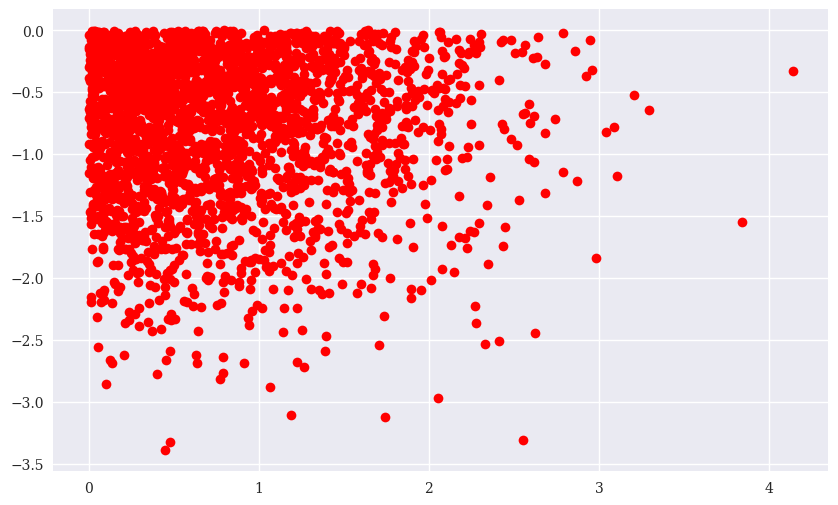

In [100]:
res = res[::100]  
plt.figure(figsize=(10, 6))
plt.plot(res[:, 0], res[:, 1], 'ro');

### From SQL to pandas

In [101]:
%time data = pd.read_sql('SELECT * FROM numbers', con)  

CPU times: user 829 ms, sys: 61.6 ms, total: 891 ms
Wall time: 891 ms


In [102]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [103]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()  

CPU times: user 4.2 ms, sys: 3.74 ms, total: 7.93 ms
Wall time: 8.22 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
5,0.1893,-0.0207,-0.2104,0.9419,0.2551
8,1.4784,-0.3333,-0.7050,0.3586,-0.3937
10,0.8092,-0.9899,1.0364,-1.0453,0.0579
11,0.9065,-0.7757,-0.9267,0.7797,0.0863


In [104]:
%%time
q = '(No1 < -0.5 | No1 > 0.5) & (No2 < -1 | No2 > 1)'  
res = data[['No1', 'No2']].query(q)  

CPU times: user 15.8 ms, sys: 4.66 ms, total: 20.5 ms
Wall time: 10.2 ms


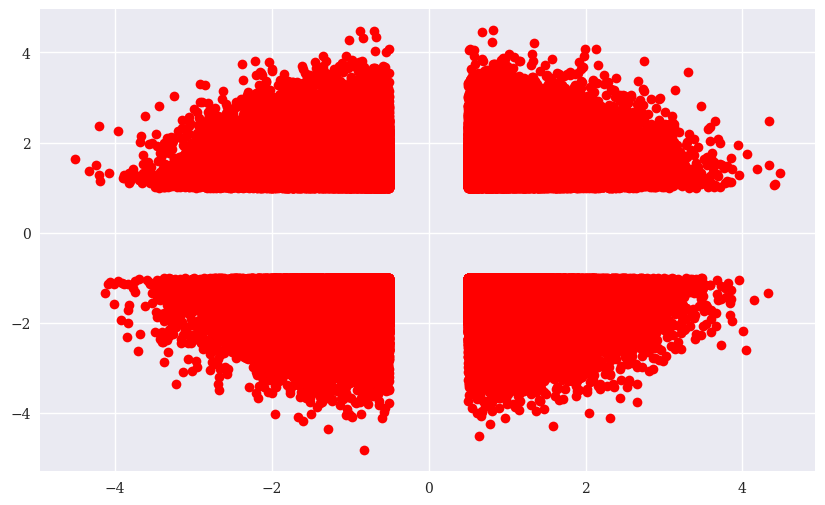

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(res['No1'], res['No2'], 'ro');

In [106]:
h5s = pd.HDFStore(filename + '.h5s', 'w')  

In [107]:
%time h5s['data'] = data  

CPU times: user 11.9 ms, sys: 11.7 ms, total: 23.6 ms
Wall time: 22.6 ms


In [108]:
h5s  

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/yves/Temp/data/numbers.h5s

In [109]:
h5s.close()  

In [110]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')  
data_ = h5s['data']  
h5s.close()  

CPU times: user 7.54 ms, sys: 9.27 ms, total: 16.8 ms
Wall time: 16 ms


In [111]:
data_ is data  

False

In [112]:
(data_ == data).all()  

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [113]:
np.allclose(data_, data)  

True

In [114]:
ll $path*  

-rw-r--r--  1 yves  staff  52633600  4 Jun 11:54 /Users/yves/Temp/data/numbers.db
-rw-r--r--  1 yves  staff  48007240  4 Jun 11:54 /Users/yves/Temp/data/numbers.h5s


### Data as CSV File

In [115]:
%time data.to_csv(filename + '.csv')  

CPU times: user 2.7 s, sys: 40.7 ms, total: 2.74 s
Wall time: 2.74 s


In [116]:
ll $path

total 285624
-rw-r--r--  1 yves  staff  43834157  4 Jun 11:55 numbers.csv
-rw-r--r--  1 yves  staff  52633600  4 Jun 11:54 numbers.db
-rw-r--r--  1 yves  staff  48007240  4 Jun 11:54 numbers.h5s


In [117]:
%time df = pd.read_csv(filename + '.csv')  

CPU times: user 235 ms, sys: 33.1 ms, total: 268 ms
Wall time: 267 ms


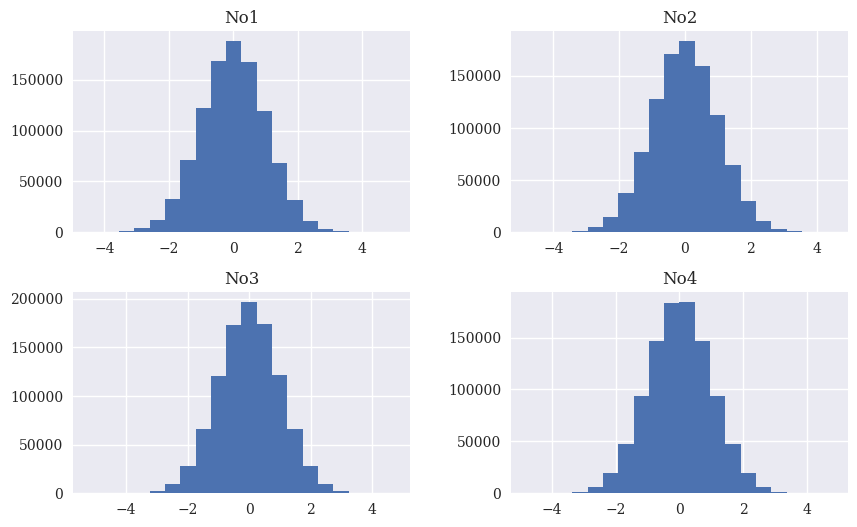

In [118]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20, figsize=(10, 6));

### Data as Excel File

In [119]:
%time data[:100000].to_excel(filename + '.xlsx')

CPU times: user 6.31 s, sys: 105 ms, total: 6.42 s
Wall time: 6.43 s


In [120]:
%time df = pd.read_excel(filename + '.xlsx', 'Sheet1', index_col=0)  

CPU times: user 2.7 s, sys: 19.8 ms, total: 2.72 s
Wall time: 2.71 s


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   No1     100000 non-null  float64
 1   No2     100000 non-null  float64
 2   No3     100000 non-null  float64
 3   No4     100000 non-null  float64
 4   No5     100000 non-null  float64
dtypes: float64(5)
memory usage: 4.6 MB


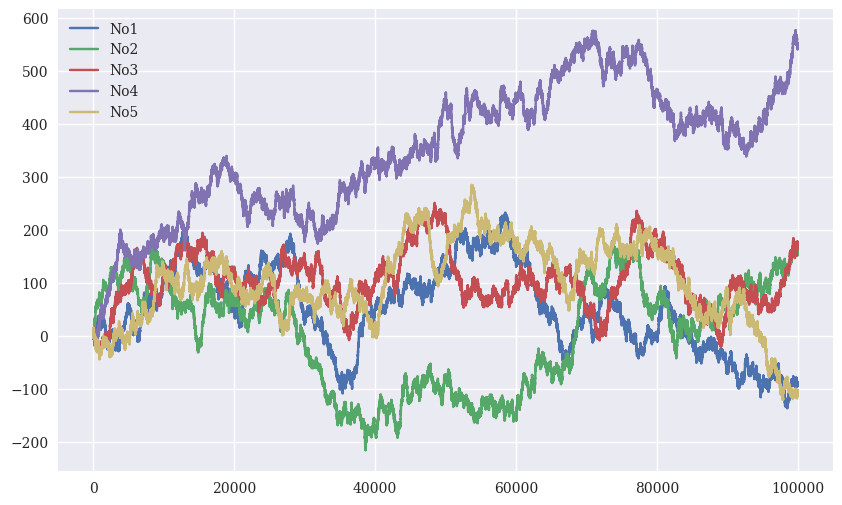

In [122]:
df.cumsum().plot(figsize=(10, 6));

In [123]:
ll $path*

-rw-r--r--  1 yves  staff  43834157  4 Jun 11:55 /Users/yves/Temp/data/numbers.csv
-rw-r--r--  1 yves  staff  52633600  4 Jun 11:54 /Users/yves/Temp/data/numbers.db
-rw-r--r--  1 yves  staff  48007240  4 Jun 11:54 /Users/yves/Temp/data/numbers.h5s
-rw-r--r--  1 yves  staff   4012953  4 Jun 11:55 /Users/yves/Temp/data/numbers.xlsx


In [124]:
rm -f $path*

## Fast I/O with PyTables

In [125]:
import tables as tb  
import datetime as dt

### Working with Tables

In [126]:
filename = path + 'pytab.h5'

In [127]:
h5 = tb.open_file(filename, 'w')  

In [128]:
row_des = {
    'Date': tb.StringCol(26, pos=1),  
    'No1': tb.IntCol(pos=2),  
    'No2': tb.IntCol(pos=3),  
    'No3': tb.Float64Col(pos=4),  
    'No4': tb.Float64Col(pos=5)  
    }

In [129]:
rows = 2000000

In [130]:
filters = tb.Filters(complevel=0)  

In [131]:
tab = h5.create_table('/', 'ints_floats',  
                      row_des,  
                      title='Integers and Floats',  
                      expectedrows=rows,  
                      filters=filters)  

In [132]:
type(tab)

tables.table.Table

In [133]:
tab

/ints_floats (Table(np.int64(0),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)

In [134]:
pointer = tab.row  

In [135]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))  

In [136]:
ran_flo = np.random.standard_normal((rows, 2)).round(4)  

In [137]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()  
    pointer['No1'] = ran_int[i, 0]  
    pointer['No2'] = ran_int[i, 1]  
    pointer['No3'] = ran_flo[i, 0]  
    pointer['No4'] = ran_flo[i, 1]  
    pointer.append()  
tab.flush()  

CPU times: user 3.57 s, sys: 26.9 ms, total: 3.6 s
Wall time: 3.6 s


In [138]:
tab  

/ints_floats (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)

In [139]:
ll $path*

-rw-r--r--  1 yves  staff  100156248  4 Jun 11:55 /Users/yves/Temp/data/pytab.h5


In [140]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                                 ('No3', '<f8'), ('No4', '<f8')])  

In [141]:
sarray = np.zeros(len(ran_int), dtype=dty)  

In [142]:
sarray[:4]  

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.),
       (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [143]:
%%time
sarray['Date'] = dt.datetime.now()  
sarray['No1'] = ran_int[:, 0]  
sarray['No2'] = ran_int[:, 1]  
sarray['No3'] = ran_flo[:, 0]  
sarray['No4'] = ran_flo[:, 1]  

CPU times: user 27 ms, sys: 8.02 ms, total: 35.1 ms
Wall time: 33.4 ms


In [144]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)  

CPU times: user 7.64 ms, sys: 13.8 ms, total: 21.4 ms
Wall time: 21.2 ms


/ints_floats_from_array (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)

In [145]:
type(h5)

tables.file.File

In [146]:
h5  

File(filename=/Users/yves/Temp/data/pytab.h5, title=np.str_(''), mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) np.str_('')
/ints_floats (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)
/ints_floats_from_array (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float

In [147]:
h5.remove_node('/', 'ints_floats_from_array')  

In [148]:
tab[:3]  

array([(b'2025-06-04 11:55:11.009396', 8576, 5991, -0.0528, 0.2468),
       (b'2025-06-04 11:55:11.009445', 2990, 9310, -0.0261, 0.3932),
       (b'2025-06-04 11:55:11.009448', 4400, 4823,  0.9133, 0.2579)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [149]:
tab[:4]['No4']  

array([ 0.2468,  0.3932,  0.2579, -0.5582])

In [150]:
%time np.sum(tab[:]['No3'])  

CPU times: user 8.42 ms, sys: 24.2 ms, total: 32.7 ms
Wall time: 31.9 ms


np.float64(88.8542999999997)

In [151]:
%time np.sum(np.sqrt(tab[:]['No1']))  

CPU times: user 7.78 ms, sys: 24.1 ms, total: 31.9 ms
Wall time: 30.5 ms


np.float64(133349920.3689251)

CPU times: user 32 ms, sys: 25.9 ms, total: 57.9 ms
Wall time: 56.5 ms


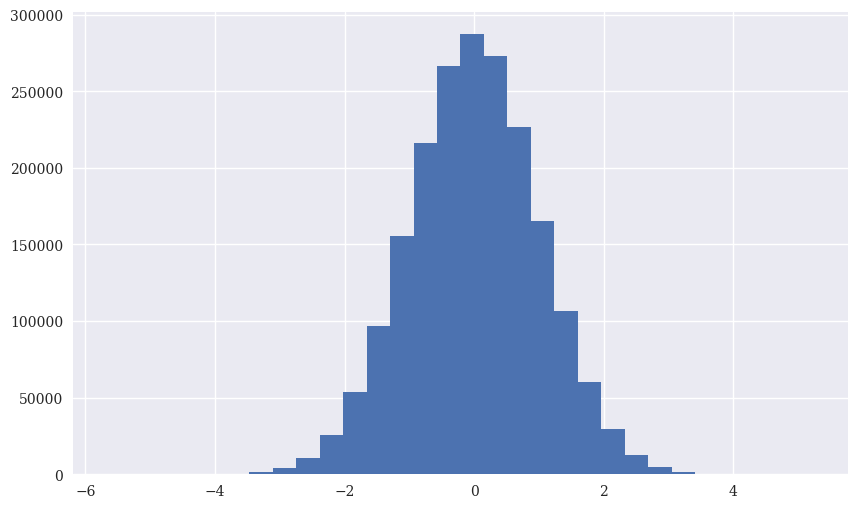

In [152]:
%%time
plt.figure(figsize=(10, 6))
plt.hist(tab[:]['No3'], bins=30);

In [153]:
query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))'  

In [154]:
iterator = tab.where(query)  

In [155]:
%time res = [(row['No3'], row['No4']) for row in iterator]  

CPU times: user 110 ms, sys: 23.6 ms, total: 134 ms
Wall time: 110 ms


In [156]:
res = np.array(res)  
res[:3]

array([[0.7694, 1.4866],
       [0.9201, 1.3346],
       [1.4701, 1.8776]])

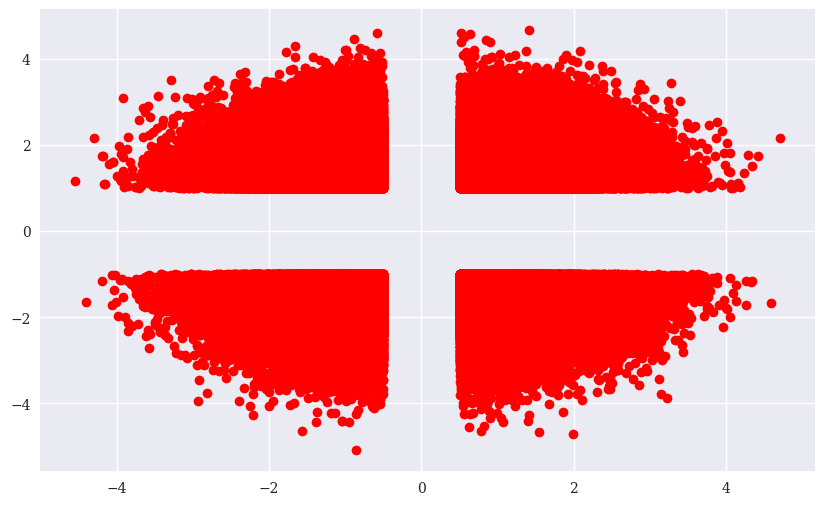

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(res.T[0], res.T[1], 'ro');

In [158]:
%%time
values = tab[:]['No3']
print('Max %18.3f' % values.max())
print('Ave %18.3f' % values.mean())
print('Min %18.3f' % values.min())
print('Std %18.3f' % values.std())

Max              5.224
Ave              0.000
Min             -5.649
Std              1.000
CPU times: user 15.8 ms, sys: 17.4 ms, total: 33.3 ms
Wall time: 32.6 ms


In [159]:
%%time
res = [(row['No1'], row['No2']) for row in
        tab.where('((No1 > 9800) | (No1 < 200)) \
                & ((No2 > 4500) & (No2 < 5500))')]

CPU times: user 31 ms, sys: 16.7 ms, total: 47.7 ms
Wall time: 28.8 ms


In [160]:
for r in res[:4]:
    print(r)

(91, 4870)
(9803, 5026)
(9846, 4859)
(9823, 5069)


In [161]:
%%time
res = [(row['No1'], row['No2']) for row in
        tab.where('(No1 == 1234) & (No2 > 9776)')]

CPU times: user 16.7 ms, sys: 16.3 ms, total: 32.9 ms
Wall time: 22.8 ms


In [162]:
for r in res:
    print(r)

(1234, 9841)
(1234, 9821)
(1234, 9867)
(1234, 9987)
(1234, 9849)
(1234, 9800)


### Working with Compressed Tables

In [163]:
filename = path + 'pytabc.h5'

In [164]:
h5c = tb.open_file(filename, 'w') 

In [165]:
filters = tb.Filters(complevel=5,  
                     complib='blosc')  

In [166]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                        expectedrows=rows, filters=filters)

In [167]:
query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))'

In [168]:
iteratorc = tabc.where(query)  

In [169]:
%time res = [(row['No3'], row['No4']) for row in iteratorc]  

CPU times: user 115 ms, sys: 27.5 ms, total: 142 ms
Wall time: 119 ms


In [170]:
res = np.array(res)
res[:3]

array([[0.7694, 1.4866],
       [0.9201, 1.3346],
       [1.4701, 1.8776]])

In [171]:
%time arr_non = tab.read()  

CPU times: user 4.55 ms, sys: 18.8 ms, total: 23.3 ms
Wall time: 22.4 ms


In [172]:
tab.size_on_disk

100122200

In [173]:
arr_non.nbytes

100000000

In [174]:
%time arr_com = tabc.read()  

CPU times: user 5.07 ms, sys: 19.3 ms, total: 24.4 ms
Wall time: 23.2 ms


In [175]:
tabc.size_on_disk

99995407

In [176]:
arr_com.nbytes

100000000

In [177]:
ll $path*  

-rw-r--r--  1 yves  staff  200312336  4 Jun 11:55 /Users/yves/Temp/data/pytab.h5
-rw-r--r--  1 yves  staff  100030703  4 Jun 11:55 /Users/yves/Temp/data/pytabc.h5


In [178]:
h5c.close()  

### Working with Arrays

In [179]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)  
arr_flo = h5.create_array('/', 'floats', ran_flo)  

CPU times: user 1.19 ms, sys: 7.78 ms, total: 8.97 ms
Wall time: 8.78 ms


In [180]:
h5  

File(filename=/Users/yves/Temp/data/pytab.h5, title=np.str_(''), mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) np.str_('')
/floats (Array(2000000, 2)) np.str_('')
  atom := Float64Atom(shape=(), dflt=np.float64(0.0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/integers (Array(2000000, 2)) np.str_('')
  atom := Int64Atom(shape=(), dflt=np.int64(0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/ints_floats (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape :=

In [181]:
ll $path*

-rw-r--r--  1 yves  staff  262344490  4 Jun 11:55 /Users/yves/Temp/data/pytab.h5
-rw-r--r--  1 yves  staff  100030703  4 Jun 11:55 /Users/yves/Temp/data/pytabc.h5


In [182]:
h5.close()

In [183]:
!rm -f $path*

### Out-of-Memory Computations

In [184]:
filename = path + 'earray.h5'

In [185]:
h5 = tb.open_file(filename, 'w') 

In [186]:
n = 500  

In [187]:
ear = h5.create_earray('/', 'ear',  
                      atom=tb.Float64Atom(),  
                      shape=(0, n))  

In [188]:
type(ear)

tables.earray.EArray

In [189]:
rand = np.random.standard_normal((n, n))  
rand[:4, :4]

array([[-1.25983231,  1.11420699,  0.1667485 ,  0.7345676 ],
       [-0.13785424,  1.22232417,  1.36303097,  0.13521042],
       [ 1.45487119, -1.47784078,  0.15027672,  0.86755989],
       [-0.63519366,  0.1516327 , -0.64939447, -0.45010975]])

In [190]:
%%time
for _ in range(750):
    ear.append(rand)  
ear.flush()

CPU times: user 105 ms, sys: 315 ms, total: 420 ms
Wall time: 449 ms


In [191]:
ear

/ear (EArray(np.int64(375000), np.int64(500))) ''
  atom := Float64Atom(shape=(), dflt=np.float64(0.0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (np.int64(16), np.int64(500))

In [192]:
ear.size_on_disk

1500032000

In [193]:
out = h5.create_earray('/', 'out',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

In [194]:
out.size_on_disk

0

In [195]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')  

In [196]:
expr.set_output(out, append_mode=True)  

In [197]:
%time expr.eval()  

CPU times: user 2.09 s, sys: 647 ms, total: 2.74 s
Wall time: 970 ms


/out (EArray(np.int64(375000), np.int64(500))) ''
  atom := Float64Atom(shape=(), dflt=np.float64(0.0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (np.int64(16), np.int64(500))

In [198]:
out.size_on_disk

1500032000

In [199]:
out[0, :10]

array([-1.73369462,  3.74824436,  0.90627898,  2.86786818,  1.75424957,
       -0.91108973, -1.68313885,  1.29073295, -1.68665599, -1.71345309])

In [200]:
%time out_ = out.read()  

CPU times: user 81 ms, sys: 278 ms, total: 359 ms
Wall time: 359 ms


In [201]:
out_[0, :10]

array([-1.73369462,  3.74824436,  0.90627898,  2.86786818,  1.75424957,
       -0.91108973, -1.68313885,  1.29073295, -1.68665599, -1.71345309])

In [202]:
import numexpr as ne  

In [203]:
expr = '3 * sin(out_) + sqrt(abs(out_))'  

In [204]:
ne.set_num_threads(1)  

10

In [205]:
%time ne.evaluate(expr)[0, :10]  

CPU times: user 1.69 s, sys: 91.9 ms, total: 1.79 s
Wall time: 1.79 s


array([-1.64358578,  0.22567882,  3.31363043,  2.50443549,  4.27413965,
       -1.41600606, -1.68373023,  4.01921805, -1.68117412, -1.66053597])

In [206]:
ne.set_num_threads(4)  

1

In [207]:
%time ne.evaluate(expr)[0, :10]  

CPU times: user 1.82 s, sys: 168 ms, total: 1.99 s
Wall time: 517 ms


array([-1.64358578,  0.22567882,  3.31363043,  2.50443549,  4.27413965,
       -1.41600606, -1.68373023,  4.01921805, -1.68117412, -1.66053597])

In [208]:
h5.close()

In [209]:
!rm -f $path*

## TsTables

### Sample Data

In [210]:
no = 5000000  
co = 3  
interval = 1. / (12 * 30 * 24 * 60)  
vol = 0.2  

In [211]:
%%time
rn = np.random.standard_normal((no, co))  
rn[0] = 0.0  
paths = 100 * np.exp(np.cumsum(-0.5 * vol ** 2 * interval +
        vol * np.sqrt(interval) * rn, axis=0))  
paths[0] = 100  

CPU times: user 349 ms, sys: 42.8 ms, total: 391 ms
Wall time: 434 ms


In [212]:
dr = pd.date_range('2019-1-1', periods=no, freq='1s')

In [213]:
dr[-6:]

DatetimeIndex(['2019-02-27 20:53:14', '2019-02-27 20:53:15',
               '2019-02-27 20:53:16', '2019-02-27 20:53:17',
               '2019-02-27 20:53:18', '2019-02-27 20:53:19'],
              dtype='datetime64[ns]', freq='s')

In [214]:
df = pd.DataFrame(paths, index=dr, columns=['ts1', 'ts2', 'ts3'])

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2019-01-01 00:00:00 to 2019-02-27 20:53:19
Freq: s
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ts1     float64
 1   ts2     float64
 2   ts3     float64
dtypes: float64(3)
memory usage: 152.6 MB


In [216]:
df.head()

,ts1,ts2,ts3
2019-01-01 00:00:00,100.000000,100.000000,100.000000
2019-01-01 00:00:01,100.018443,99.966644,99.998255
2019-01-01 00:00:02,100.069023,100.004420,99.986646
2019-01-01 00:00:03,100.086757,100.000246,99.992042
2019-01-01 00:00:04,100.105448,100.036033,99.950618


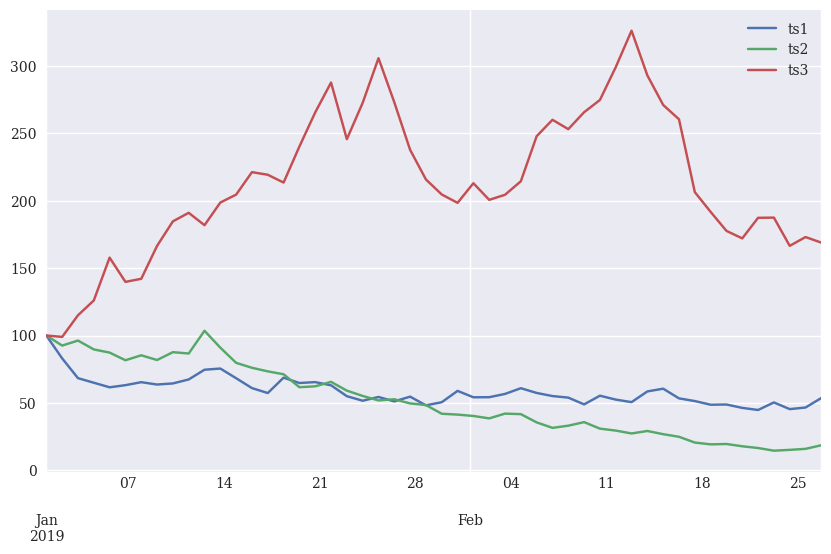

In [217]:
df[::100000].plot(figsize=(10, 6));
# plt.savefig('../../images/ch09/io_07.png')

### Data Storage (with `tstables`)

<b style="color: red;">Install the package as follows:</b>

    pip install git+https://github.com/yhilpisch/tstables

In [218]:
import tstables as tstab

In [219]:
class ts_desc(tb.IsDescription):
    timestamp = tb.Int64Col(pos=0)  
    ts1 = tb.Float64Col(pos=1)  
    ts2 = tb.Float64Col(pos=2)  
    ts3 = tb.Float64Col(pos=3)  

In [220]:
h5 = tb.open_file(path + 'tstab.h5', 'w')  

In [221]:
ts = h5.create_ts('/', 'ts', ts_desc)  

In [222]:
%time ts.append(df)  

CPU times: user 170 ms, sys: 96.9 ms, total: 266 ms
Wall time: 266 ms


In [223]:
type(ts)

tstables.tstable.TsTable

In [224]:
ls -n $path

total 253616
-rw-r--r--  1 501  20  129850400  4 Jun 11:55 tstab.h5


In [225]:
read_start_dt = dt.datetime(2019, 2, 1, 0, 0)  
read_end_dt = dt.datetime(2019, 2, 5, 23, 59)  #<2>

In [226]:
%time rows = ts.read_range(read_start_dt, read_end_dt)  

CPU times: user 28.6 ms, sys: 32.6 ms, total: 61.2 ms
Wall time: 59.5 ms


In [227]:
rows.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431941 entries, 2019-02-01 00:00:00 to 2019-02-05 23:59:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts1     431941 non-null  float64
 1   ts2     431941 non-null  float64
 2   ts3     431941 non-null  float64
dtypes: float64(3)
memory usage: 13.2 MB


In [228]:
rows.head()  

,ts1,ts2,ts3
2019-02-01 00:00:00,52.063640,40.474580,217.324713
2019-02-01 00:00:01,52.087455,40.471911,217.250070
2019-02-01 00:00:02,52.084808,40.458013,217.228712
2019-02-01 00:00:03,52.073536,40.451408,217.302912
2019-02-01 00:00:04,52.056133,40.450951,217.207481


In [229]:
h5.close()

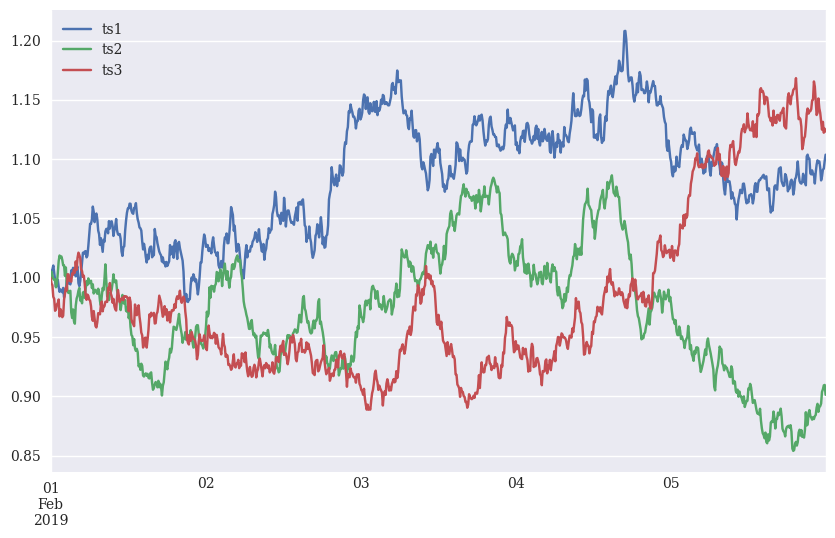

In [230]:
(rows[::500] / rows.iloc[0]).plot(figsize=(10, 6));

In [231]:
import random

In [232]:
h5 = tb.open_file(path + 'tstab.h5', 'r')

In [233]:
ts = h5.root.ts._f_get_timeseries()  

In [234]:
%%time
for _ in range(100):  
    d = random.randint(1, 24)  
    read_start_dt = dt.datetime(2019, 2, d, 0, 0, 0)
    read_end_dt = dt.datetime(2019, 2, d + 3, 23, 59, 59)
    rows = ts.read_range(read_start_dt, read_end_dt)

CPU times: user 1.19 s, sys: 241 ms, total: 1.43 s
Wall time: 1.43 s


In [235]:
rows.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345600 entries, 2019-02-13 00:00:00 to 2019-02-16 23:59:59
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts1     345600 non-null  float64
 1   ts2     345600 non-null  float64
 2   ts3     345600 non-null  float64
dtypes: float64(3)
memory usage: 10.5 MB


In [236]:
!rm $path/tstab.h5

<img src="https://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="https://tpq.io" target="_blank">https://tpq.io</a> | <a href="https://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>